### Example notebook on how to truncate waveform by `flow`

In [1]:
import sys
sys.path.append("../")
%load_ext autoreload
%autoreload 2

In [2]:
from gw_eccentricity.truncate_waveform_by_flow import truncate_waveform_by_flow
from gw_eccentricity.load_data import load_waveform
from gw_eccentricity.plot_settings import use_fancy_plotsettings, labelsDict

/home1/md.shaikh/miniconda3/envs/eccimrct/lib/python3.8/site-packages/gwtools/rotations.py:63: UserWarning: Could not import GWFrames, needed for rotations module
  _warnings.warn("Could not import GWFrames, needed for rotations module")
/home1/md.shaikh/miniconda3/envs/eccimrct/lib/python3.8/site-packages/gwtools/__init__.py:11: UserWarning: Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.
  _warnings.warn("Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.")


Load an eccentric eob waveform

In [3]:
kwargs = {"filepath": "../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q1.00_chi1z0.00_chi2z0.00_EOBecc0.1973794859_Momega00.010_meanAno1.571.h5"}
dataDict = load_waveform("EOB", **kwargs)

Plot and see how the f22 looks

In [4]:
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, '$f_{22}$ [1/$M$]')

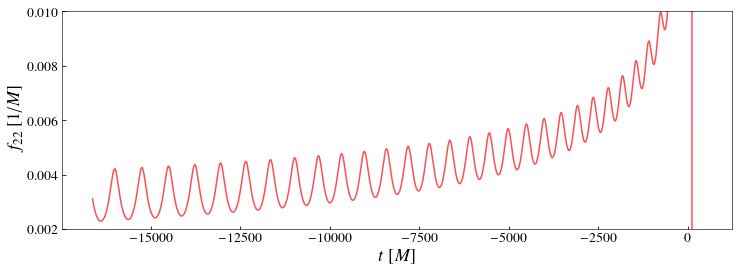

In [5]:
use_fancy_plotsettings()
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(dataDict["t"], -np.gradient(np.unwrap(np.angle(dataDict["hlm"][(2, 2)])))/2/np.pi)
ax.set_ylim(0.002, 0.01)
ax.set_xlabel(labelsDict["t_dimless"])
ax.set_ylabel("$f_{22}$ [1/$M$]")

Let's trucate the waveform using `flow=0.003`

In [6]:
?truncate_waveform_by_flow

Signature:
truncate_waveform_by_flow(
    dataDict=None,
    flow=None,
    method='Amplitude',
    spline_kwargs=None,
    extra_kwargs=None,
)
Docstring:
Truncate waveform by flow.

Eccentric waveforms have a non-monotonic instantaneous frequency.
Therefore, truncating waveform by demanding that the truncated waveform
should contain all frequencies that are greater than or equal to a given
minimum frequency, say flow, must be done carefully since the instantaneous
frequency can be equal to the given flow at multiple points in time.

We need to find the time tlow, such that all the frequencies at t < tlow
are < flow and therefore the t >= tlow part of the waveform would
retain all the frequencies that are >= flow. Note that the t >= tlow part
could contain some frequencies < flow but that is fine, all we need is not
to loose any frequencies >= flow.

This could be done by using the frequency interpolant omega22_p(t) through
the pericenters because
1. It is monotonic function of time.


In [19]:
flow = 0.005
truncatedDict, gwecc_object = truncate_waveform_by_flow(
    dataDict=dataDict,
    flow=flow)

Now let's have a look at the f22 of these waveforms again

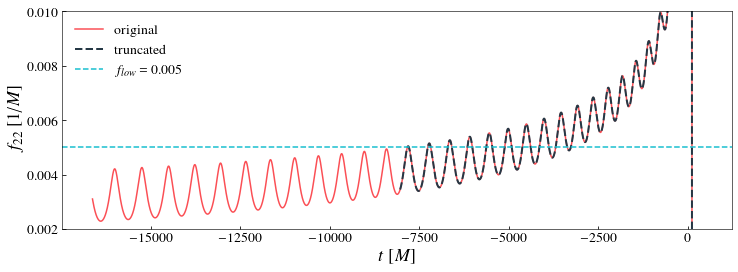

In [20]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(dataDict["t"], -np.gradient(np.unwrap(np.angle(dataDict["hlm"][(2, 2)])))/2/np.pi, label="original")
ax.plot(truncatedDict["t"], -np.gradient(np.unwrap(np.angle(truncatedDict["hlm"][(2, 2)])))/2/np.pi, ls="--", lw=2, label="truncated")
ax.set_ylim(0.002, 0.01)
ax.set_ylabel("$f_{22}$")
ax.axhline(flow, c="tab:cyan", ls="--", label=f"$f_{{low}}={flow}$")
ax.set_xlabel(labelsDict["t_dimless"])
ax.set_ylabel("$f_{22}$ [1/$M$]")
ax.legend(loc="upper left")

Try a different `flow`

In [21]:
flow = 0.007
truncatedDict, gwecc_object = truncate_waveform_by_flow(
    dataDict=dataDict,
    flow=flow)

Now let's have a look at the f22 of these waveforms again

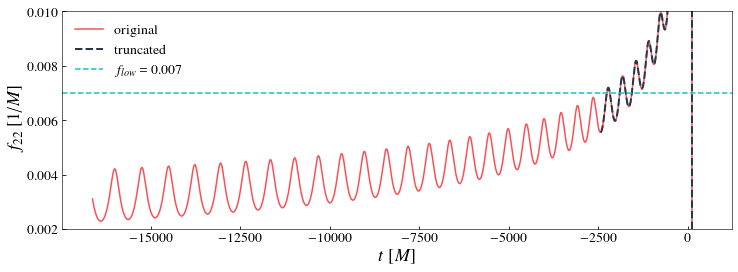

In [22]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(dataDict["t"], -np.gradient(np.unwrap(np.angle(dataDict["hlm"][(2, 2)])))/2/np.pi, label="original")
ax.plot(truncatedDict["t"], -np.gradient(np.unwrap(np.angle(truncatedDict["hlm"][(2, 2)])))/2/np.pi, ls="--", lw=2, label="truncated")
ax.set_ylim(0.002, 0.01)
ax.set_ylabel("$f_{22}$")
ax.axhline(flow, c="tab:cyan", ls="--", label=f"$f_{{low}}={flow}$")
ax.set_xlabel(labelsDict["t_dimless"])
ax.set_ylabel("$f_{22}$ [1/$M$]")
ax.legend(loc="upper left")

Last one

In [27]:
flow = 0.006
truncatedDict, gwecc_object = truncate_waveform_by_flow(
    dataDict=dataDict,
    flow=flow)

Now let's have a look at the f22 of these waveforms again

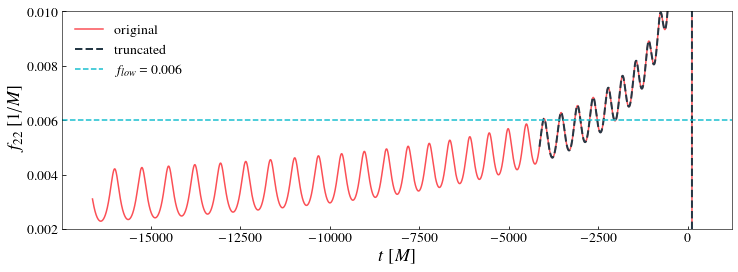

In [28]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(dataDict["t"], -np.gradient(np.unwrap(np.angle(dataDict["hlm"][(2, 2)])))/2/np.pi, label="original")
ax.plot(truncatedDict["t"], -np.gradient(np.unwrap(np.angle(truncatedDict["hlm"][(2, 2)])))/2/np.pi, ls="--", lw=2, label="truncated")
ax.set_ylim(0.002, 0.01)
ax.set_ylabel("$f_{22}$")
ax.axhline(flow, c="tab:cyan", ls="--", label=f"$f_{{low}}={flow}$")
ax.set_xlabel(labelsDict["t_dimless"])
ax.set_ylabel("$f_{22}$ [1/$M$]")
ax.legend(loc="upper left")

Access info in `gwecc_object`

In [13]:
gwecc_object.method

'Amplitude'

In [14]:
gwecc_object.f_low_for_truncating, gwecc_object.tlow_for_trucating

(0.0025, -15999.046027714583)

In [17]:
gwecc_object.f22_pericenters_interp, gwecc_object.t_pericenters_interp

(array([0.00420699, 0.00420705, 0.00420711, ..., 0.0116272 , 0.01163429,
        0.01164138]),
 array([-15999.04602771, -15998.04602771, -15997.04602771, ...,
          -456.04602771,   -455.04602771,   -454.04602771]))

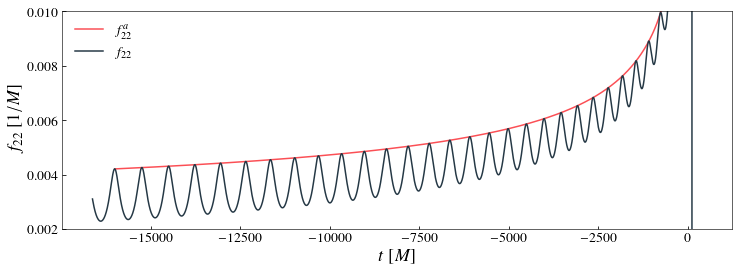

In [18]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(gwecc_object.t_pericenters_interp, gwecc_object.f22_pericenters_interp, label=r"$f^a_{22}$")
ax.set_ylabel(r"$f_{22}$ [$1/M$]")
ax.set_xlabel(labelsDict["t_dimless"])
ax.plot(dataDict["t"], -np.gradient(np.unwrap(np.angle(dataDict["hlm"][(2, 2)])))/2/np.pi, label=r"$f_{22}$")
ax.set_ylim(0.002, 0.01)
ax.legend()